#JAX transform functions
##jit() 

jit compiles your functions using XLA and caches them -> speeeeed 🚀

In [5]:
import jax.numpy as jnp
import numpy as np
from jax import jit
from jax import random
import matplotlib.pyplot as plt

In [6]:
# Simple helper visualization function
def visualize_fn(fn, l=-10, r=10, n=1000):
    x = np.linspace(l, r, num=n)
    y = fn(x)
    plt.plot(x, y); plt.show()

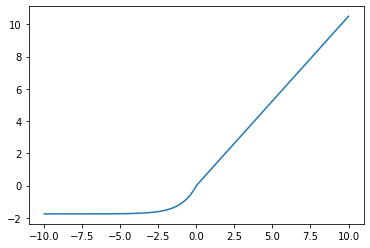

non-jit version:
100 loops, best of 5: 1.95 ms per loop
jit version:
The slowest run took 419.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 168 µs per loop


In [7]:
seed = 0
key = random.PRNGKey(seed)

# Define a function
def selu(x, alpha=1.67, lmbda=1.05):  # note: SELU is an activation function
    return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

selu_jit = jit(selu)  # let's jit it

# Visualize SELU (just for your understanding, it's always a good idea to visualize stuff)
visualize_fn(selu)

# Benchmark non-jit vs jit version
data = random.normal(key, (1000000,))

print('non-jit version:')
%timeit selu(data).block_until_ready()
print('jit version:')
%timeit selu_jit(data).block_until_ready()
